In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID' ,axis = 'columns', inplace= True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
    #pd.to_numeric(df.TotalCharges)#error shows due to space
    

In [7]:
df.TotalCharges[488]

' '

In [8]:
pd.to_numeric(df.TotalCharges ,errors = 'coerce' ).isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges ,errors = 'coerce' ).isnull()].shape

(11, 20)

In [10]:
df1 = df[df.TotalCharges!= ' ']
df1.shape

(7032, 20)

In [11]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [12]:
df1.TotalCharges.dtypes

dtype('float64')

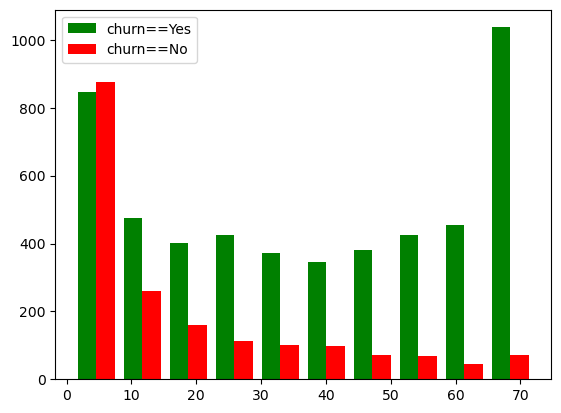

In [13]:
tenure_churn_no = df1[df.Churn=='No'].tenure
tenure_churn_yes = df1[df.Churn=='Yes'].tenure

plt.hist([tenure_churn_no,tenure_churn_yes] ,color =['green' , 'red'] , label = ['churn==Yes' ,'churn==No'])
plt.legend()

In [14]:
def print_unique_column_val(df):
    for column in df: 
        if df[column].dtypes=='object':
            print(f'{column} : {df1[column].unique()}')

In [15]:
print_unique_column_val(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [16]:
df1.replace('No internet service' , 'No' , inplace = True)
df1.replace('No phone service' , 'No' , inplace = True)


In [17]:
print_unique_column_val(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
col_yes_no = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
              'DeviceProtection','TechSupport','TechSupport','StreamingTV','PaperlessBilling','StreamingMovies', 'Churn']

for col in col_yes_no:
    df1[col].replace({'Yes':1,'No':0},inplace = True)

In [19]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [20]:
df1['gender'].replace({'Female':1 ,'Male': 0} , inplace = True)

In [21]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [22]:
df2 = pd.get_dummies(data=df1,columns = ['InternetService' ,'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [23]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [24]:
#threee columns are not in form of 0 and 1 so we need to scale them

In [25]:
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [26]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [27]:
x = df2.drop('Churn' , axis = 'columns')
y = df2['Churn']

In [28]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state =5)

In [29]:
X_train.shape

(5625, 26)

In [30]:
X_test.shape

(1407, 26)

In [31]:
len(X_train.columns)

26

In [32]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5336 - accuracy: 0.7221
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.7941
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8027
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8020
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8028
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8057
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8027
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8050
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8087
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4070 - accura

In [33]:
model.evaluate(X_train , y_train)

176/176 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8434


[0.33810877799987793, 0.8433777689933777]

In [34]:
yp = model.predict(X_test)
yp[:6]

44/44 [==============================] - 0s 1ms/step


array([[3.7951729e-01],
       [4.6855843e-01],
       [4.1325446e-04],
       [8.7168616e-01],
       [5.5058724e-01],
       [7.3314083e-01]], dtype=float32)

In [35]:
y_test[:6]

2660    0
744     0
5579    1
64      1
3287    1
816     1
Name: Churn, dtype: int64

In [36]:
y_p=[]
for element in yp:
    if element>0.5:
        y_p.append(1)
    else:
        y_p.append(0)

In [37]:
y_p[:5]

[0, 0, 0, 1, 1]

In [38]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.63      0.55      0.59       408

    accuracy                           0.77      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.77      0.77      1407



Text(45.722222222222214, 0.5, 'truth')

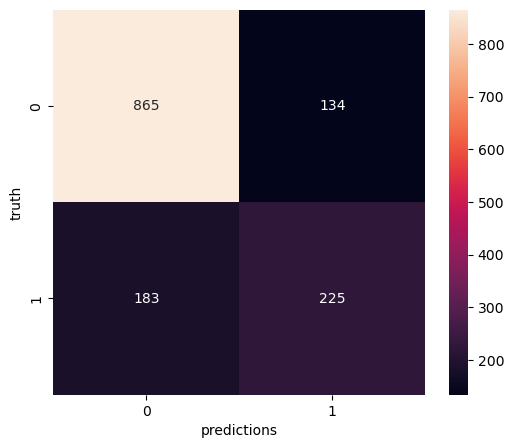

In [39]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions= y_p)

plt.figure(figsize = (6,5))
sns.heatmap(cm , annot = True,fmt = 'd')
plt.xlabel('predictions')
plt.ylabel('truth')

In [40]:
#accuracy
(887+193)/(887+193+112+215)

0.767590618336887

In [41]:
#precision for 0
887/(887+215)

0.8049001814882033

In [42]:
#precision for 1
193/(193+112)

0.6327868852459017

In [43]:
#recall for 0
887/(887+112)


0.8878878878878879

In [44]:
193/(193+215)

0.4730392156862745